# **Exploratory data Analysis**

In [88]:
import pandas as pd
import numpy as np
import yfinance as yf

ticker ="AAPL"
start_date='2024-01-01'
end_date='2025-01-01'
data = yf.download(ticker, start=start_date, end=end_date)
print(type(data))
print(data)

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  184.734985  187.521338  182.993517  186.237618  82488700
2024-01-03  183.351761  184.973819  182.535751  183.321908  58414500
2024-01-04  181.023163  182.197403  179.998185  181.261983  71983600
2024-01-05  180.296707  181.869006  179.291637  181.102771  62303300
2024-01-08  184.655365  184.695178  180.615161  181.202281  59144500
...                ...         ...         ...         ...       ...
2024-12-24  258.200012  258.209991  255.289993  255.490005  23234700
2024-12-26  259.019989  260.100006  257.630005  258.190002  27237100
2024-12-27  255.589996  258.700012  253.059998  257.829987  42355300
2024-12-30  252.199997  253.500000  250.750000  252.229996  35557500
2024-12-31  250.419998  253.279999  249.429993  252.440002  39480

In [91]:
data.columns #why is it a tuple?

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

**The yfinance Dataset returns a multi-column. NEED to Preprocess to suitable formate before use.**

In [92]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.734985,187.521338,182.993517,186.237618,82488700
2024-01-03,183.351761,184.973819,182.535751,183.321908,58414500
2024-01-04,181.023163,182.197403,179.998185,181.261983,71983600
2024-01-05,180.296707,181.869006,179.291637,181.102771,62303300
2024-01-08,184.655365,184.695178,180.615161,181.202281,59144500


**Only 252 days of trading in 1 year**

In [93]:
data.shape

(252, 5)

In [95]:
data.columns = [ col[0] for col in data.columns.values]
print(data)

                 Close        High         Low        Open    Volume
Date                                                                
2024-01-02  184.734985  187.521338  182.993517  186.237618  82488700
2024-01-03  183.351761  184.973819  182.535751  183.321908  58414500
2024-01-04  181.023163  182.197403  179.998185  181.261983  71983600
2024-01-05  180.296707  181.869006  179.291637  181.102771  62303300
2024-01-08  184.655365  184.695178  180.615161  181.202281  59144500
...                ...         ...         ...         ...       ...
2024-12-24  258.200012  258.209991  255.289993  255.490005  23234700
2024-12-26  259.019989  260.100006  257.630005  258.190002  27237100
2024-12-27  255.589996  258.700012  253.059998  257.829987  42355300
2024-12-30  252.199997  253.500000  250.750000  252.229996  35557500
2024-12-31  250.419998  253.279999  249.429993  252.440002  39480700

[252 rows x 5 columns]


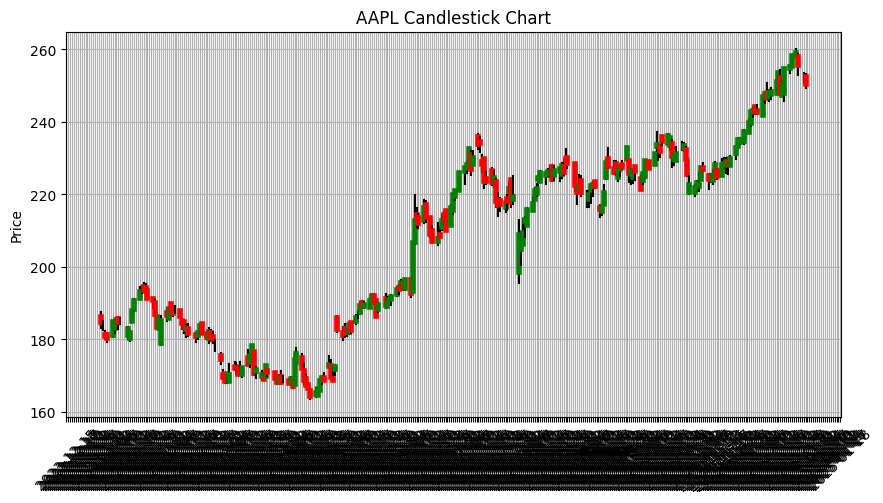

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, date2num
import matplotlib.dates as mdates
import matplotlib.ticker as mticker


# Convert date to numerical format for plotting
data["Date_Num"] = date2num(data.index)

# Create Figure and Axes
fig, ax = plt.subplots(figsize=(10, 5))


for idx, row in data.iterrows():
    color = "green" if row["Close"] >= row["Open"] else "red"
    ax.plot([row["Date_Num"], row["Date_Num"]], [row["Low"], row["High"]], color="black")  # Wick
    ax.plot([row["Date_Num"], row["Date_Num"]], [row["Open"], row["Close"]], color=color, linewidth=4)  # Candle body

# Formatting the x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format date labels
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set daily intervals
plt.xticks(rotation=45)  # Rotate date labels for better visibility

# Labels and Grid
ax.set_title("AAPL Candlestick Chart")
ax.set_ylabel("Price")
ax.grid()

plt.show()

**Simplify The Problem By only Trading on Close Price**

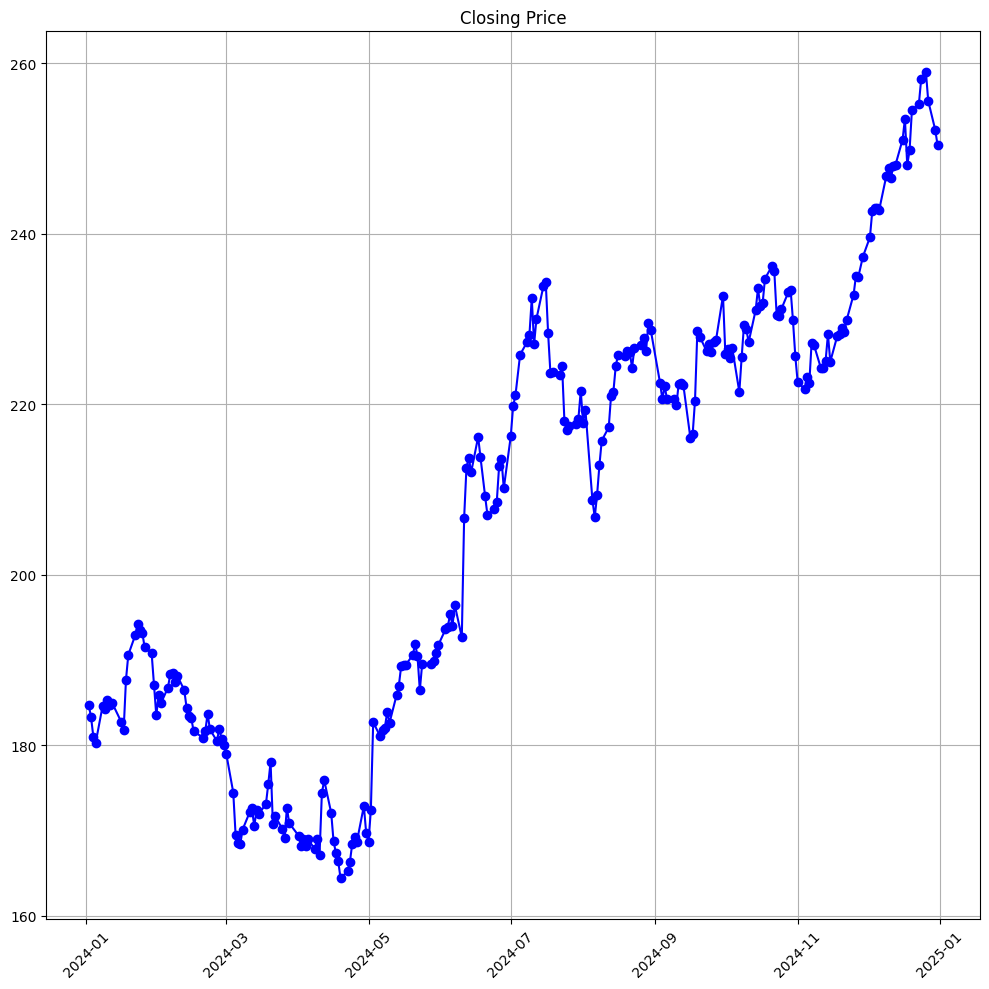

In [99]:

fig, axs = plt.subplots( figsize=(10, 10), sharex=True)

axs.plot(data.index, data["Close"], label="Closing Price", marker="o", linestyle="-", color="blue")
axs.set_title("Closing Price")
axs.grid()

plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

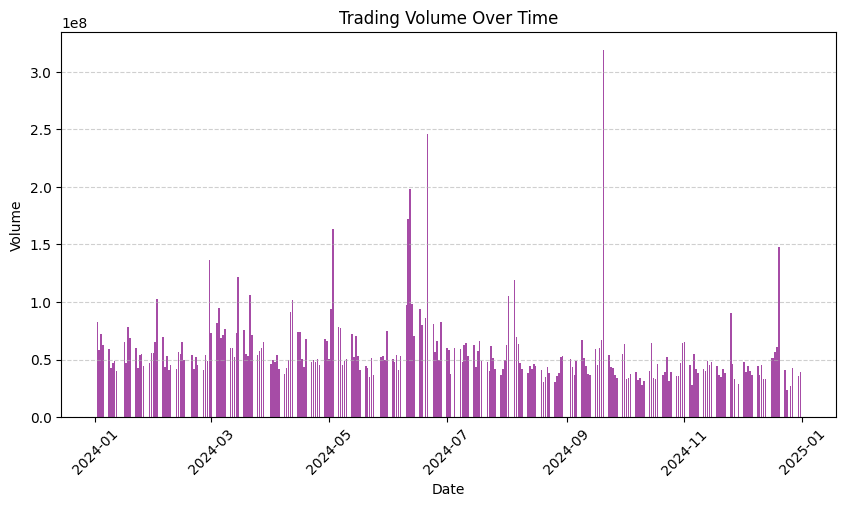

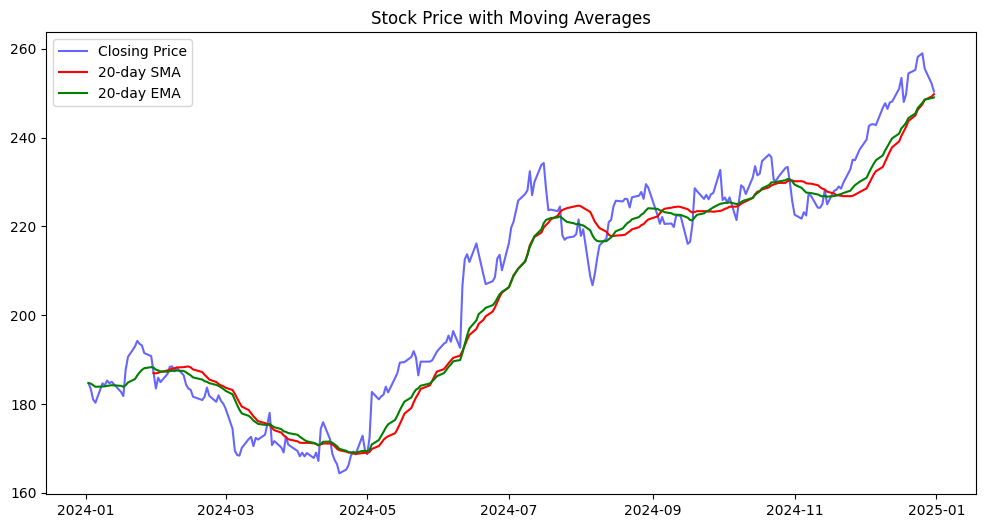

In [101]:
# Plot Bar Chart
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(data.index, data["Volume"].values.flatten(), color="purple", alpha=0.7)

# Formatting
ax.set_title("Trading Volume Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Volume")
ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.xticks(rotation=45)
plt.show()

data["SMA_20"] = data["Close"].rolling(window=20).mean()
data["EMA_20"] = data["Close"].ewm(span=20, adjust=False).mean()

plt.figure(figsize=(12,6))
plt.plot(data["Close"], label="Closing Price", color="blue", alpha=0.6)
plt.plot(data["SMA_20"], label="20-day SMA", color="red")
plt.plot(data["EMA_20"], label="20-day EMA", color="green")
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.show()


**Returns info about Stock Fundamentals**




In [9]:
ticker_info = yf.Ticker("AAPL").info
ticker_info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p


** EPS Growth → Increasing EPS means a company is growing profits.**

**Comparing PE to Sector Average → If PE is too high, stock may be overvalued.**

**EPS Growth → Increasing EPS means a company is growing profits.**

**Comparing PE to Sector Average → If PE is too high, stock may be overvalued.**

**Low PE with High Growth → A good buying opportunity (undervalued growth).**

**Negative EPS → Indicates losses; PE is not meaningful in this case.**


In [103]:
'''
Important data for stock analysis:

Open , High, Low , Volume, Close, SMA_50 ,  SMA_200, EMA, Volatility, PE_ratio, Eps
'''
eps = ticker_info.get('trailingEps')
pe_ratio = ticker_info.get('trailingPE')
print("EPS: ",eps)
print("P/E ratio",pe_ratio)

EPS:  6.3
P/E ratio 36.131744


In [104]:
'''
Volatility = standard_dev_return * root(time)
'''
close_price = data['Close']
close_price.head()
Volatility=close_price.rolling(30).std() * np.sqrt(252) # initial 30 are NaN becuase rolling(30)
Volatility.dropna(inplace=True)
print(Volatility)
print("No of dates Remaining: ",Volatility.shape[0])
print()
# use log(Ct/Ct-1) for scaling
log_returns = np.log(close_price / close_price.shift(1))
print(log_returns)
Volatility=log_returns.rolling(30).std() * np.sqrt(252)
print("Scaled Volatility:", Volatility)

Date
2024-02-13     60.156169
2024-02-14     60.635299
2024-02-15     60.712348
2024-02-16     60.221686
2024-02-20     59.676322
                 ...    
2024-12-24    164.843287
2024-12-26    166.446596
2024-12-27    164.076745
2024-12-30    160.829386
2024-12-31    152.576071
Name: Close, Length: 223, dtype: float64
No of dates Remaining:  223

Date
2024-01-02         NaN
2024-01-03   -0.007516
2024-01-04   -0.012782
2024-01-05   -0.004021
2024-01-08    0.023887
                ...   
2024-12-24    0.011413
2024-12-26    0.003171
2024-12-27   -0.013331
2024-12-30   -0.013352
2024-12-31   -0.007083
Name: Close, Length: 252, dtype: float64
Scaled Volatility: Date
2024-01-02         NaN
2024-01-03         NaN
2024-01-04         NaN
2024-01-05         NaN
2024-01-08         NaN
                ...   
2024-12-24    0.136741
2024-12-26    0.136101
2024-12-27    0.145910
2024-12-30    0.151623
2024-12-31    0.145752
Name: Close, Length: 252, dtype: float64


No of dates Remaining:  222


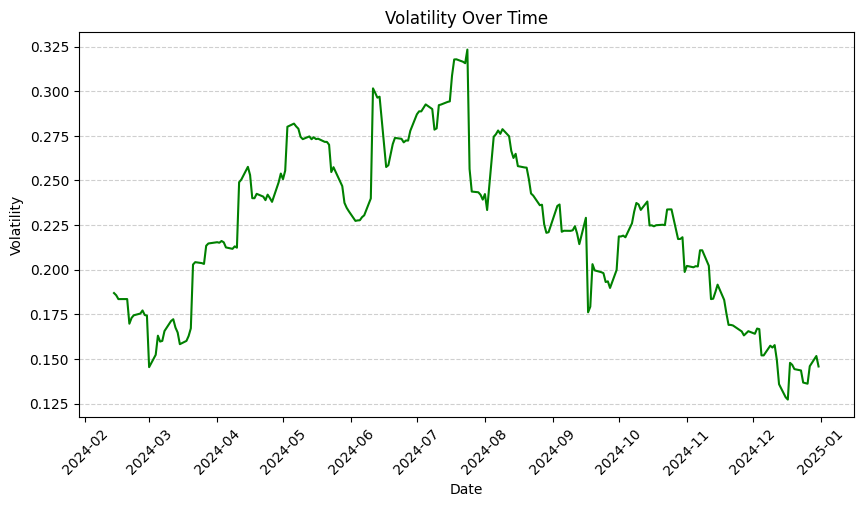

In [105]:
Volatility.dropna(inplace=True)
print("No of dates Remaining: ",Volatility.shape[0])
#plot

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(Volatility.index, Volatility, color="green", label="Volatility")
ax.set_title("Volatility Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Volatility")
ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.xticks(rotation=45)
plt.show()


RSI > 70 → Overbought (price may fall) 🔴

RSI < 30 → Oversold (price may rise) 🟢

RSI between 30-70 → Neutral or normal trading zone.

👉 Overbought means the stock has risen too fast and might correct downwards.

👉 Oversold means the stock has dropped too much and might bounce back.

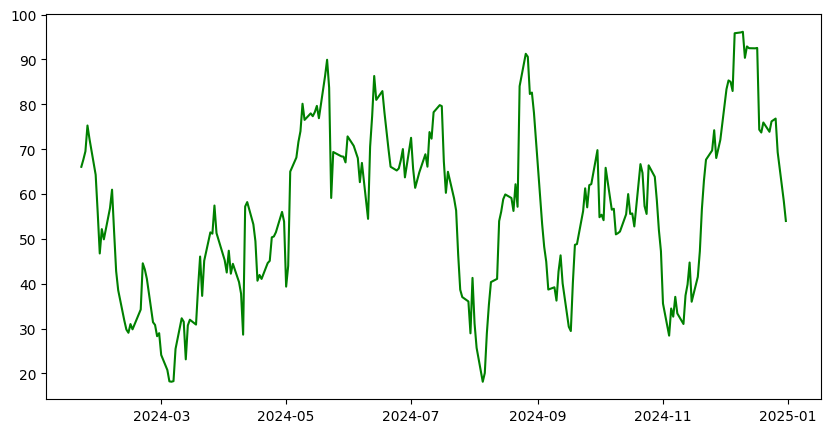

In [106]:
'''
We include these Macro and tech indicator as they represent trend, momentum , volatility
'''
def compute_RSI(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    # Avoid division by zero by adding a small epsilon
    loss.replace(0, 1e-10, inplace=True)

    RS = gain / loss
    return 100 - (100 / (1 + RS))

data["RSI"] = compute_RSI(data["Close"])
#plot
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(data.index, data["RSI"], color="green", label="RSI")


                Open      High       Low    Volume     Close    SMA_20  \
Open        1.000000  0.997244  0.998276 -0.193086  0.995738  0.962329   
High        0.997244  1.000000  0.997335 -0.163987  0.998371  0.963481   
Low         0.998276  0.997335  1.000000 -0.202564  0.997932  0.961411   
Volume     -0.193086 -0.163987 -0.202564  1.000000 -0.185148 -0.225139   
Close       0.995738  0.998371  0.997932 -0.185148  1.000000  0.963233   
SMA_20      0.962329  0.963481  0.961411 -0.225139  0.963233  1.000000   
SMA_50      0.893064  0.891410  0.895216 -0.267093  0.894977  0.958581   
EMA_20      0.974027  0.974465  0.973453 -0.221713  0.974468  0.997920   
Volatility -0.131347 -0.121495 -0.143365  0.147388 -0.134082 -0.225764   

              SMA_50    EMA_20  Volatility  
Open        0.893064  0.974027   -0.131347  
High        0.891410  0.974465   -0.121495  
Low         0.895216  0.973453   -0.143365  
Volume     -0.267093 -0.221713    0.147388  
Close       0.894977  0.974468   -

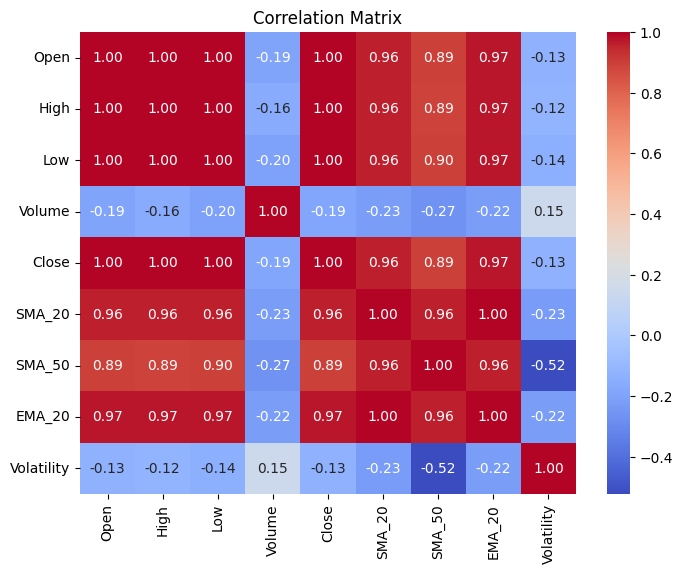

In [111]:
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Returns'] = data['Close'].pct_change()
data['Volatility'] = data['Returns'].rolling(window=30).std() * np.sqrt(252)
correlation = data[["Open","High","Low","Volume",'Close', 'SMA_20', 'SMA_50', 'EMA_20', 'Volatility']].corr()
print(correlation)

# Heatmap for correlation
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**The high correlation among Open, High, Low, and Close (OHLC) values indicates that these price metrics move together, reflecting consistent market behavior. In contrast, the negative correlation of volume with OHLC suggests that increased trading activity may coincide with price declines. Trend indicators like SMAs and EMAs are positively correlated, while volatility exhibits a negative relationship, indicating that strong price trends often occur with reduced market volatility.**

[*********************100%***********************]  4 of 4 completed


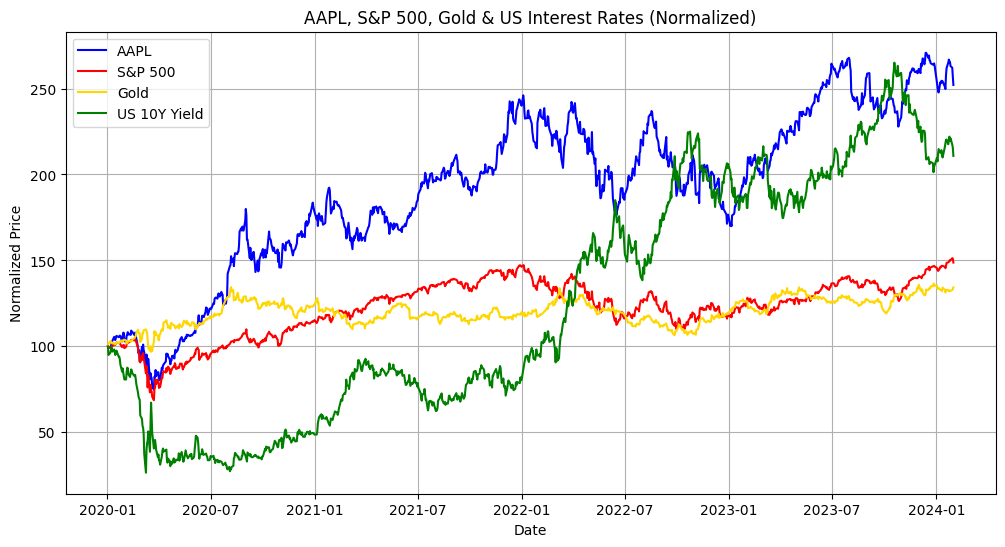

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Download data for AAPL, S&P 500, Gold, and US 10-Year Treasury Yield
tickers = ["AAPL", "^GSPC", "GC=F", "^TNX"]
data = yf.download(tickers, start="2020-01-01", end="2024-02-01")

# Rename columns
data.columns = [col[0] + "_" + col[1] for col in data.columns.values]

# Select closing prices
data = data[['Close_AAPL', "Close_^GSPC", "Close_GC=F", "Close_^TNX"]]

# Normalize prices for comparison (scale all to start from 100)
normalized_data = data / data.iloc[0] * 100

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(normalized_data['Close_AAPL'], label="AAPL", color="blue")
plt.plot(normalized_data['Close_^GSPC'], label="S&P 500", color="red")
plt.plot(normalized_data['Close_GC=F'], label="Gold", color="gold")
plt.plot(normalized_data['Close_^TNX'], label="US 10Y Yield", color="green")

# Labels & Title
plt.title("AAPL, S&P 500, Gold & US Interest Rates (Normalized)")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()


             Close_AAPL  Close_^GSPC  Close_GC=F  Close_^TNX
Close_AAPL     1.000000     0.897538    0.629535    0.715743
Close_^GSPC    0.897538     1.000000    0.501359    0.503367
Close_GC=F     0.629535     0.501359    1.000000    0.357506
Close_^TNX     0.715743     0.503367    0.357506    1.000000


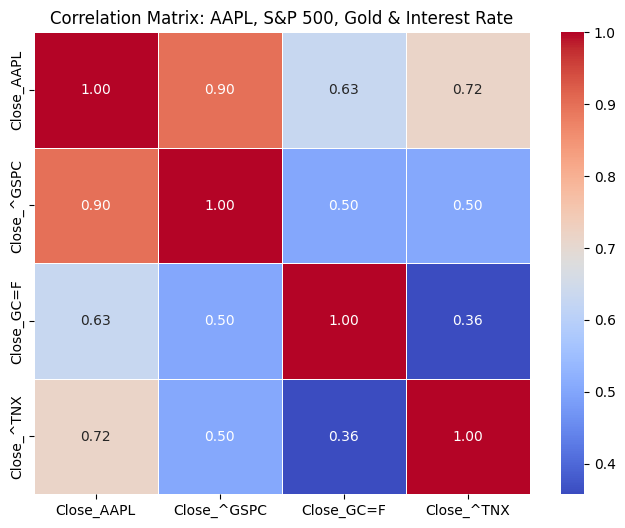

In [120]:
data = data[['Close_AAPL', "Close_^GSPC", "Close_GC=F", "Close_^TNX"]]

# Compute correlation matrix
correlation = data.corr()
print(correlation)

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: AAPL, S&P 500, Gold & Interest Rate')
plt.show()

AAPL is highly correlated with the market, meaning broad market movements strongly impact it.

Gold & Stocks moved together moderately, which could be due to inflation-driven rallies.

Interest rates had a moderate positive correlation with stocks, which may suggest a unique market trend where rising rates did not immediately harm tech stocks.

  
 **We can effectively be utilized in a state space framework to model a Markov**

 Decision Process (MDP). By incorporating these metrics, we can capture the dynamics of stock price movements and their relationships with broader market indicators.

To ensure accurate modeling, it is essential to normalize these metrics for proper scaling. Normalization will help in mitigating the effects of differing magnitudes and units, allowing for a more coherent integration of the metrics into the state space. This approach will enhance the robustness of the MDP, facilitating better decision-making and predictions in financial contexts.
